<a href="https://colab.research.google.com/github/bajajdivya/ids-project/blob/main/IDS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [2]:
drive.mount('/content/gdrive')
df = pd.read_csv('/content/gdrive/MyDrive/ids project/Copy of default of credit card clients.csv')
df

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [3]:
df.isnull().sum()

Unnamed: 0    0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
X12           0
X13           0
X14           0
X15           0
X16           0
X17           0
X18           0
X19           0
X20           0
X21           0
X22           0
X23           0
Y             0
dtype: int64

In [4]:

original_columns = [ 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
                    'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
                    'X21', 'X22', 'X23', 'Y']

desired_columns = [ 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
                    'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
                    'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                    'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']

df.rename(columns=dict(zip(original_columns, desired_columns)), inplace=True)
df.isnull().sum()

Unnamed: 0                    0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [5]:
df = df.drop(0, axis=0)

In [6]:
df.head()


,Unnamed: 0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
df.dtypes

Unnamed: 0                    object
LIMIT_BAL                     object
SEX                           object
EDUCATION                     object
MARRIAGE                      object
AGE                           object
PAY_0                         object
PAY_2                         object
PAY_3                         object
PAY_4                         object
PAY_5                         object
PAY_6                         object
BILL_AMT1                     object
BILL_AMT2                     object
BILL_AMT3                     object
BILL_AMT4                     object
BILL_AMT5                     object
BILL_AMT6                     object
PAY_AMT1                      object
PAY_AMT2                      object
PAY_AMT3                      object
PAY_AMT4                      object
PAY_AMT5                      object
PAY_AMT6                      object
default payment next month    object
dtype: object

In [8]:
df['bill amount'] = df['BILL_AMT5'].astype(int) + df['BILL_AMT6'].astype(int) +df['BILL_AMT4'].astype(int) + df['BILL_AMT3'].astype(int) + df['BILL_AMT2'].astype(int) + df['BILL_AMT1'].astype(int)
df = df.drop(['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'], axis=1)
df['payed amount'] = df['PAY_AMT5'].astype(int) + df['PAY_AMT6'].astype(int) +df['PAY_AMT4'].astype(int) + df['PAY_AMT3'].astype(int) + df['PAY_AMT2'].astype(int) + df['PAY_AMT1'].astype(int)
df = df.drop(['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'], axis=1)
df.head()

,Unnamed: 0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default payment next month,bill amount,payed amount
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,1,7704,689
2,2,120000,2,2,2,26,-1,2,0,0,0,2,1,17077,5000
3,3,90000,2,2,2,34,0,0,0,0,0,0,0,101653,11018
4,4,50000,2,2,1,37,0,0,0,0,0,0,0,231334,8388
5,5,50000,1,2,1,57,-1,0,-1,0,0,0,0,109339,59049


In [9]:
df = df.astype(int)
df.dtypes

Unnamed: 0                    int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
default payment next month    int64
bill amount                   int64
payed amount                  int64
dtype: object

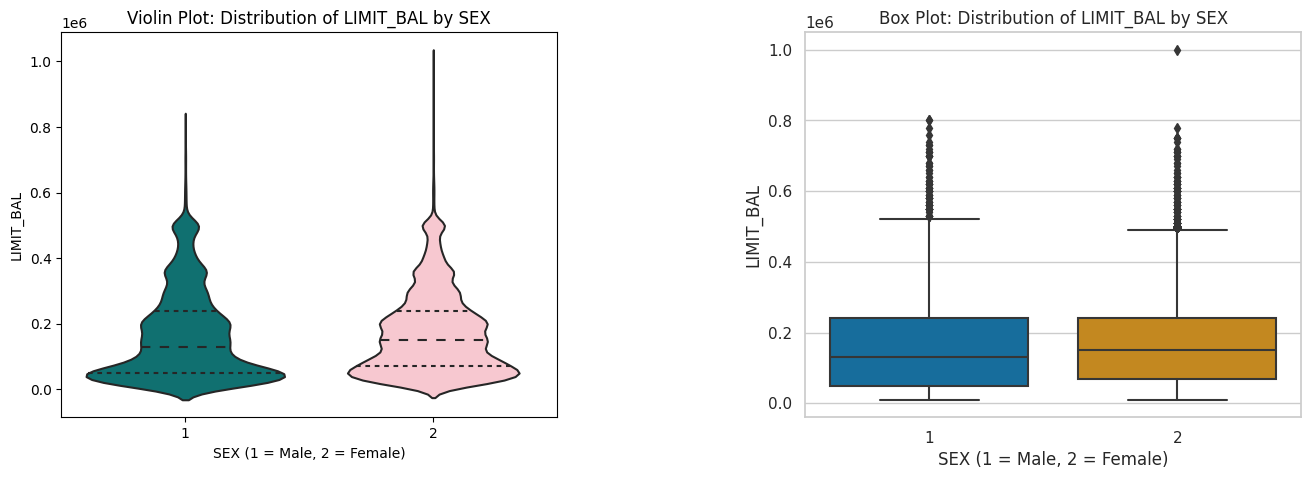

In [10]:

plt.figure(figsize=(16, 5))


plt.subplot(1, 2, 1)
sns.set(style="whitegrid")
palette_colors = {1: 'teal', 2: 'pink'}
sns.violinplot(x='SEX', y='LIMIT_BAL', data=df, palette=palette_colors, inner="quartile")
plt.title('Violin Plot: Distribution of LIMIT_BAL by SEX')
plt.xlabel('SEX (1 = Male, 2 = Female)')
plt.ylabel('LIMIT_BAL')

plt.subplots_adjust(wspace=0.5)

plt.subplot(1, 2, 2)
sns.boxplot(x='SEX', y='LIMIT_BAL', data=df, palette='colorblind')
plt.title('Box Plot: Distribution of LIMIT_BAL by SEX')
plt.xlabel('SEX (1 = Male, 2 = Female)')
plt.ylabel('LIMIT_BAL')

plt.show()


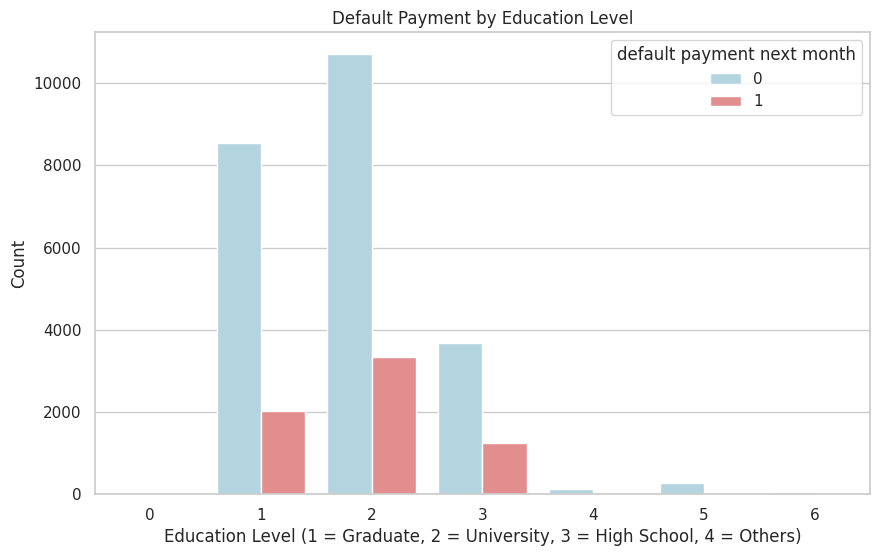

In [11]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
palette_colors = {0: 'lightblue', 1: 'lightcoral'}

sns.countplot(x='EDUCATION', hue='default payment next month', data=df, palette=palette_colors, dodge=True)

plt.title('Default Payment by Education Level')
plt.xlabel('Education Level (1 = Graduate, 2 = University, 3 = High School, 4 = Others)')
plt.ylabel('Count')
plt.show()


<Figure size 1000x600 with 0 Axes>

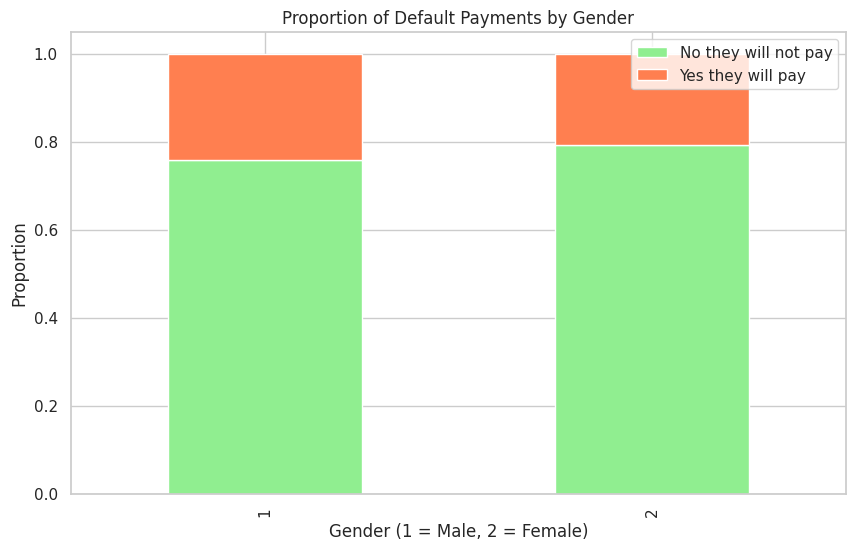

In [12]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
palette_colors = {0: 'lightgreen', 1: 'coral'}

percentage_df = df.groupby(['SEX', 'default payment next month']).size() / df.groupby('SEX').size()
percentage_df = percentage_df.unstack()
percentage_df.plot(kind='bar', stacked=True, color=palette_colors, figsize=(10, 6))
plt.title('Proportion of Default Payments by Gender')
plt.xlabel('Gender (1 = Male, 2 = Female)')
plt.ylabel('Proportion')
plt.legend(labels=['No they will not pay', 'Yes they will pay'], loc='upper right')
plt.show()


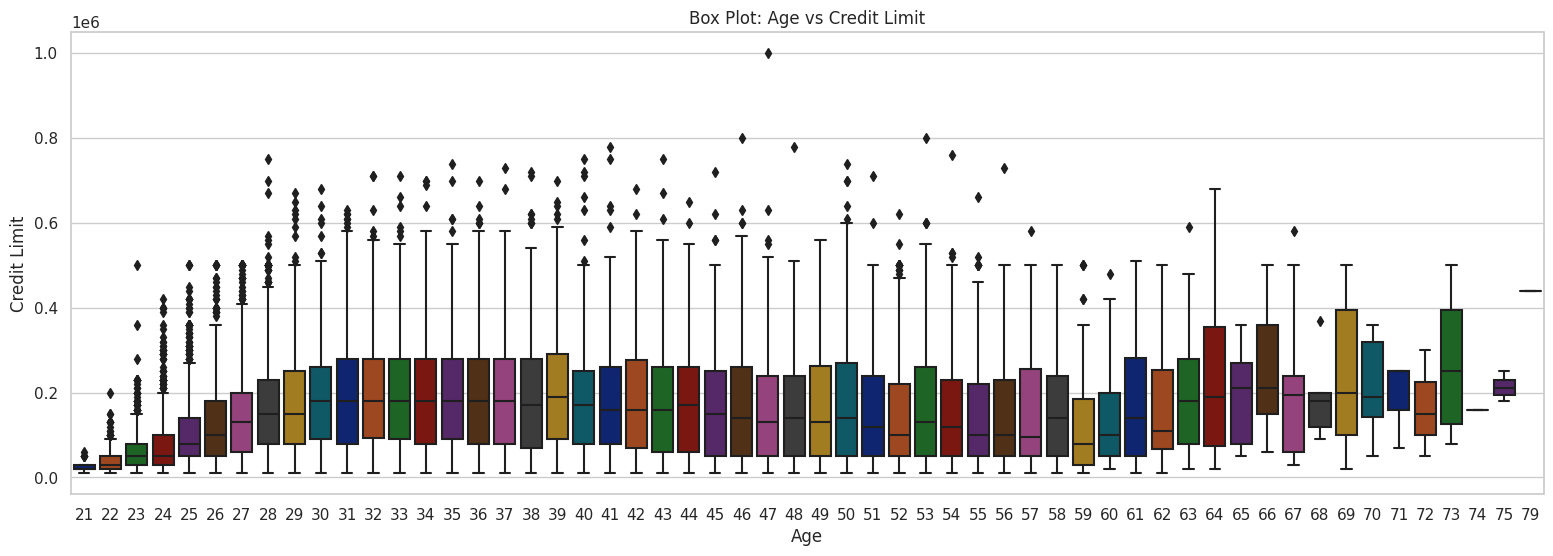

In [13]:
plt.figure(figsize=(19, 6))
sns.boxplot(x='AGE', y='LIMIT_BAL', data=df, palette='dark')
plt.title('Box Plot: Age vs Credit Limit')
plt.xlabel('Age')
plt.ylabel('Credit Limit')
plt.show()



<ipython-input-14-9b1a53195a7f>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='bill amount', y='payed amount', data=df, ci=None, color='skyblue')


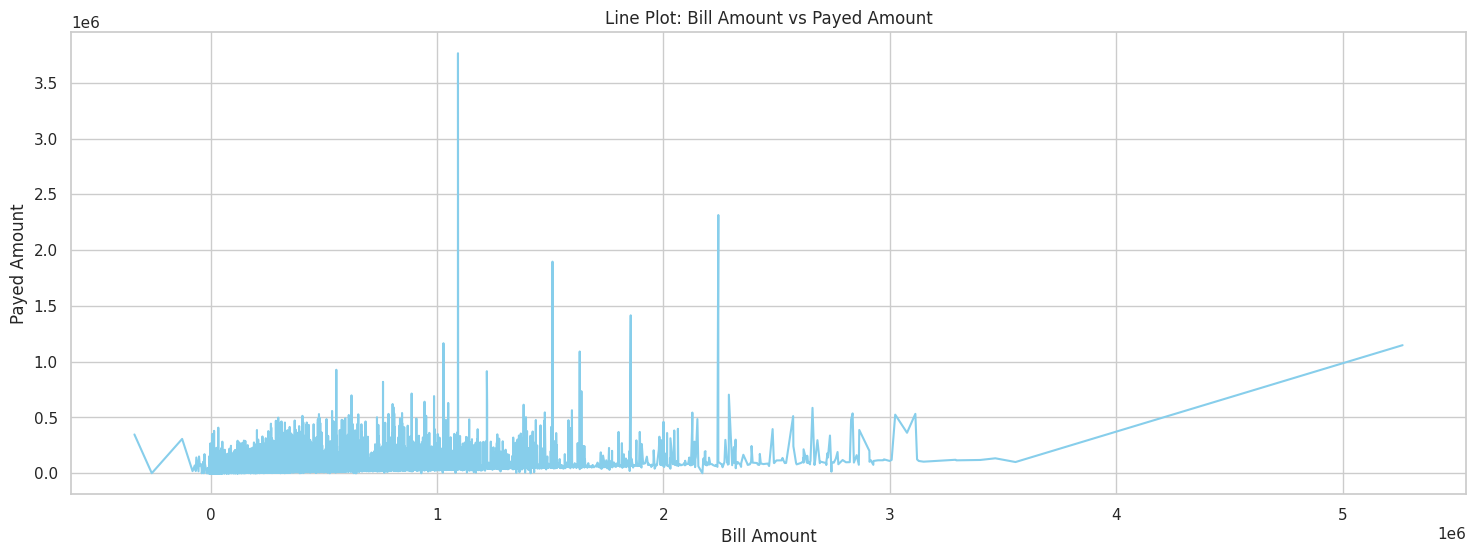

In [14]:
plt.figure(figsize=(18, 6))
sns.set(style="whitegrid")
sns.lineplot(x='bill amount', y='payed amount', data=df, ci=None, color='skyblue')
plt.title('Line Plot: Bill Amount vs Payed Amount')
plt.xlabel('Bill Amount')
plt.ylabel('Payed Amount')
plt.show()

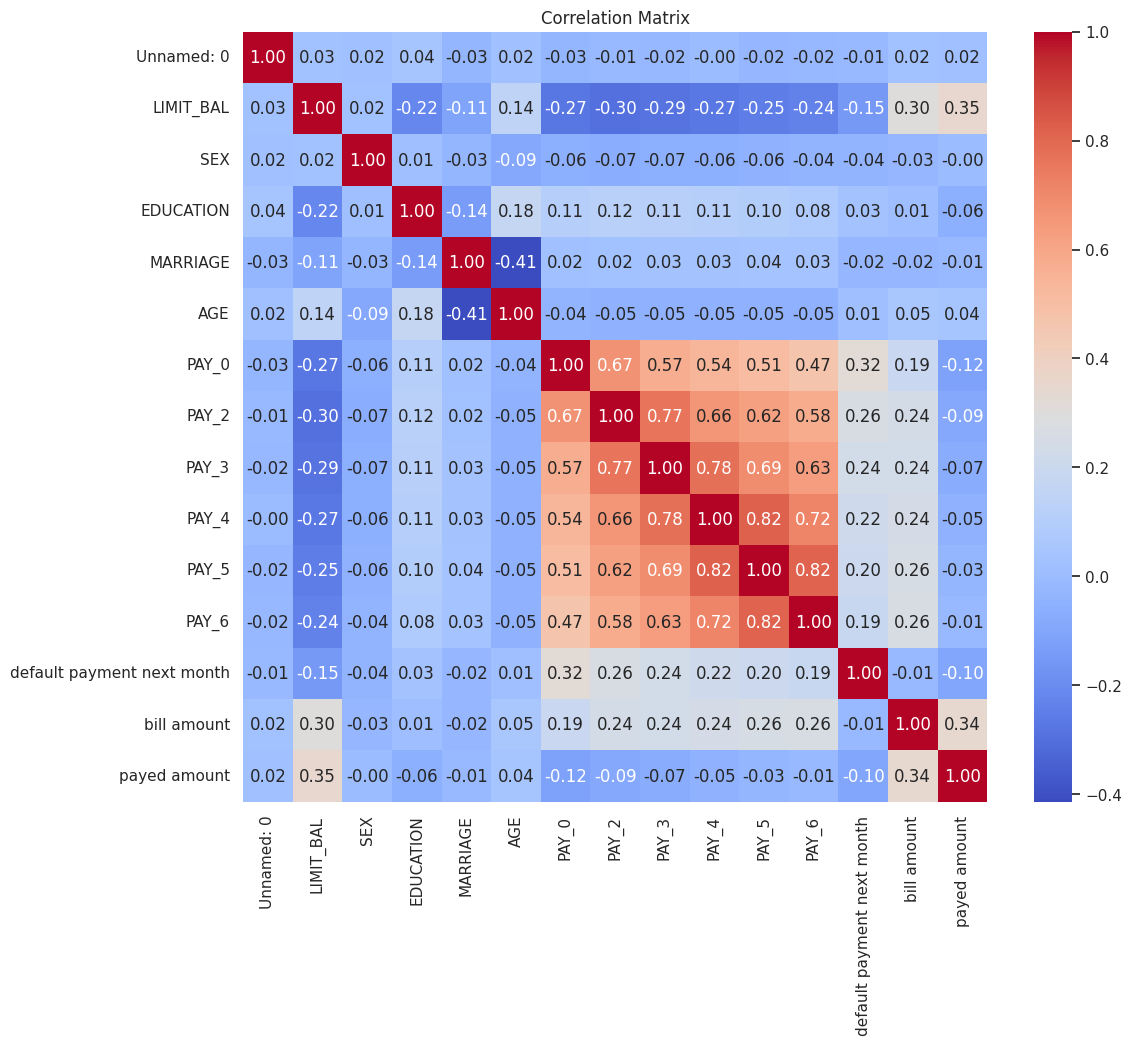

In [15]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Logistic Regression: Accuracy=0.8095, F1 Score=0.3465


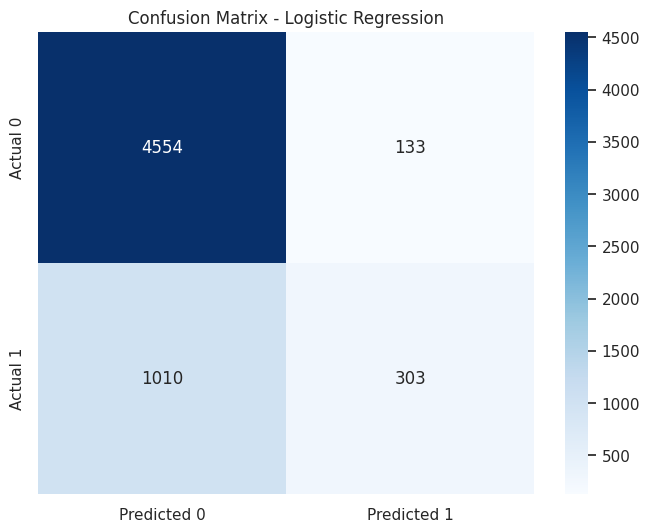

Random Forest: Accuracy=0.8062, F1 Score=0.4188


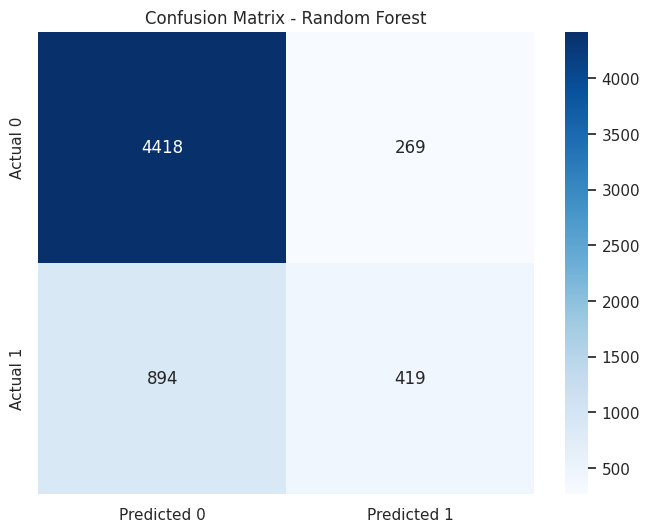

Decision Tree: Accuracy=0.7243, F1 Score=0.3955


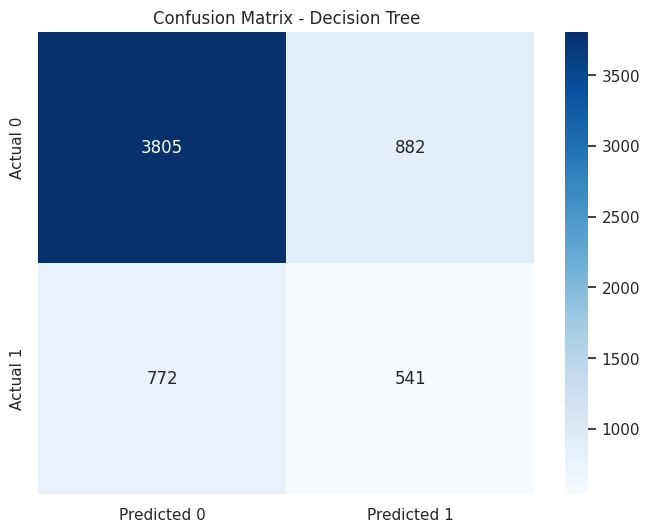

Naive Bayes: Accuracy=0.7927, F1 Score=0.4786


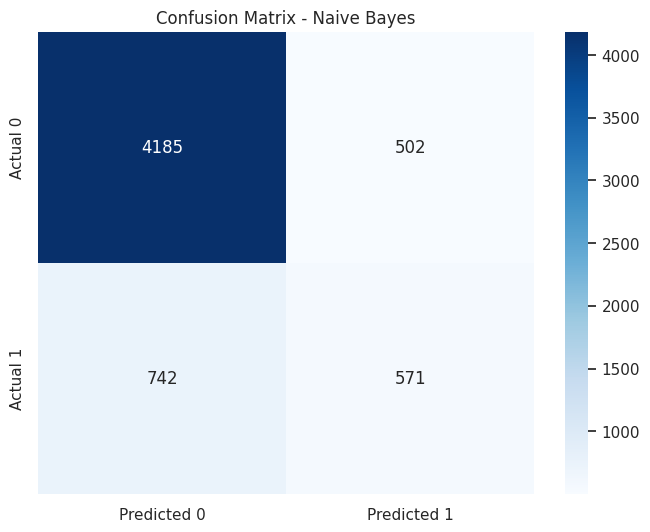

K-Nearest Neighbors: Accuracy=0.7940, F1 Score=0.4309


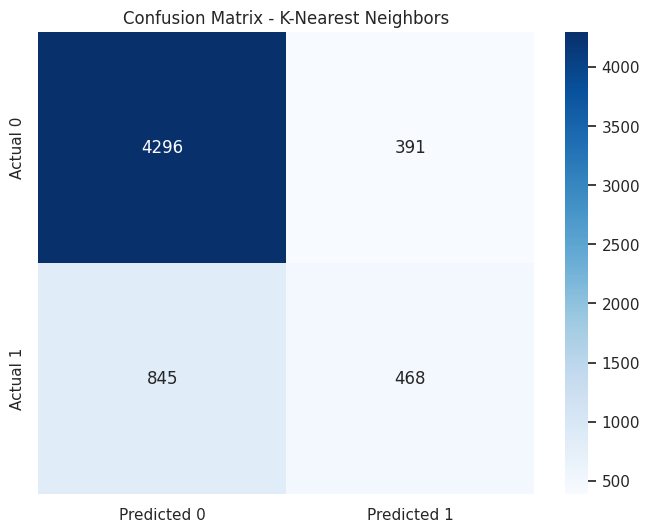

Support Vector Machine: Accuracy=0.8197, F1 Score=0.4491


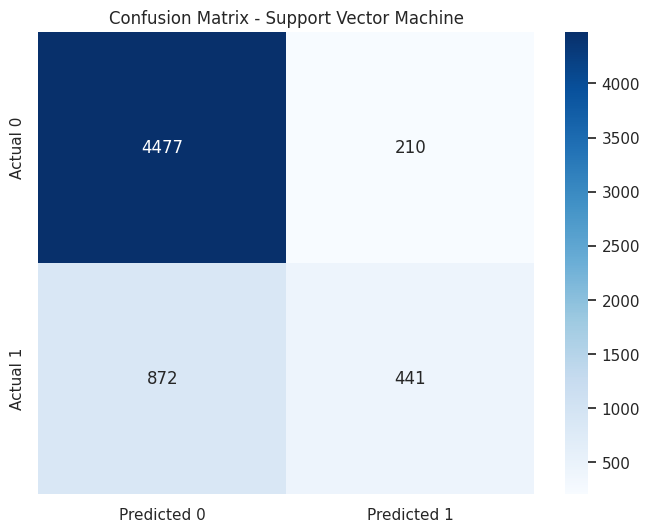

In [16]:
X = df.drop('default payment next month', axis=1)
y = df['default payment next month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=10),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(random_state=42),
}

for name, classifier in classifiers.items():
    classifier.fit(X_train_scaled, y_train)
    y_pred = classifier.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f'{name}: Accuracy={accuracy:.4f}, F1 Score={f1:.4f}')

    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()